In [1]:
cd /home

/home


In [2]:
from astropy.io import fits

import matplotlib.pyplot as plt
import numpy as np

In [53]:
cube = fits.getdata('./data/HCI/center_im.fits', ext=0)

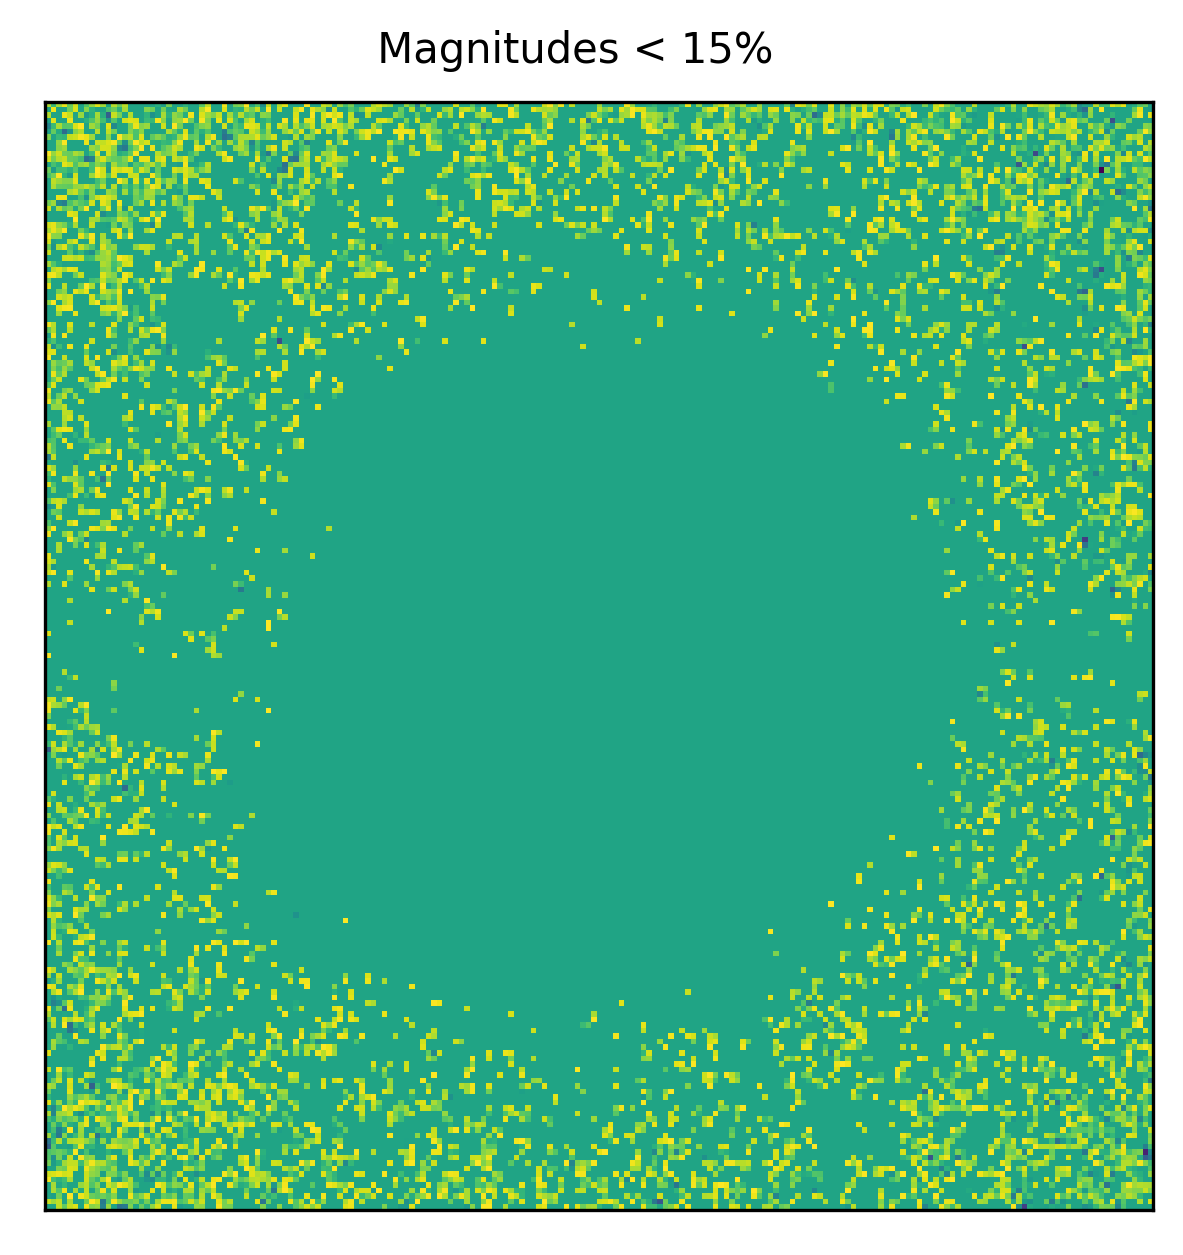

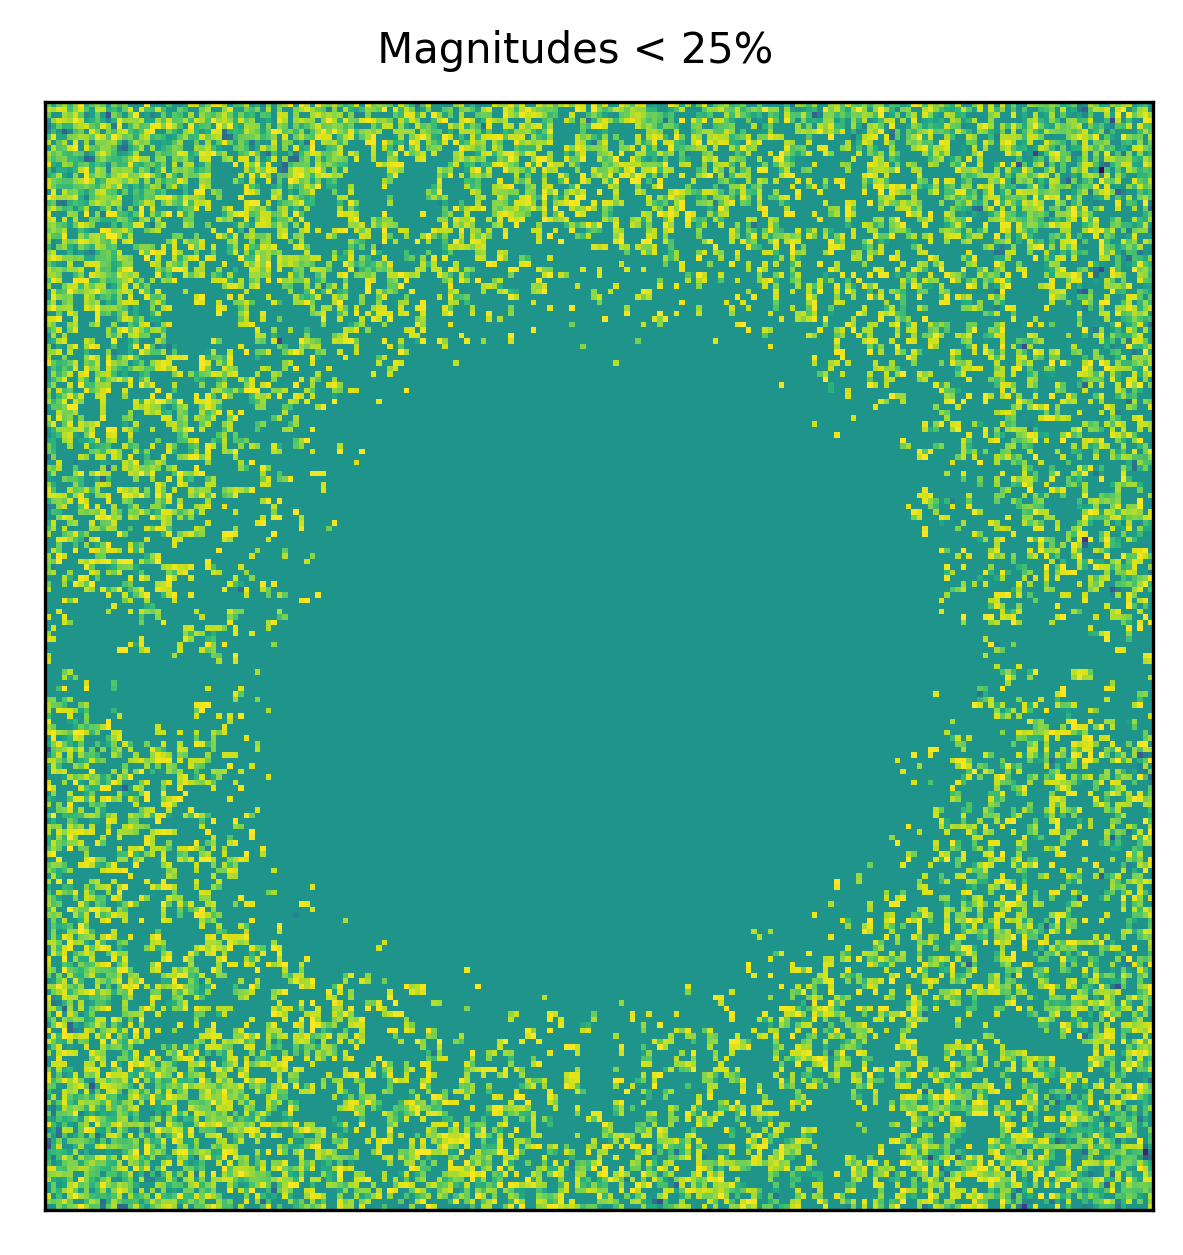

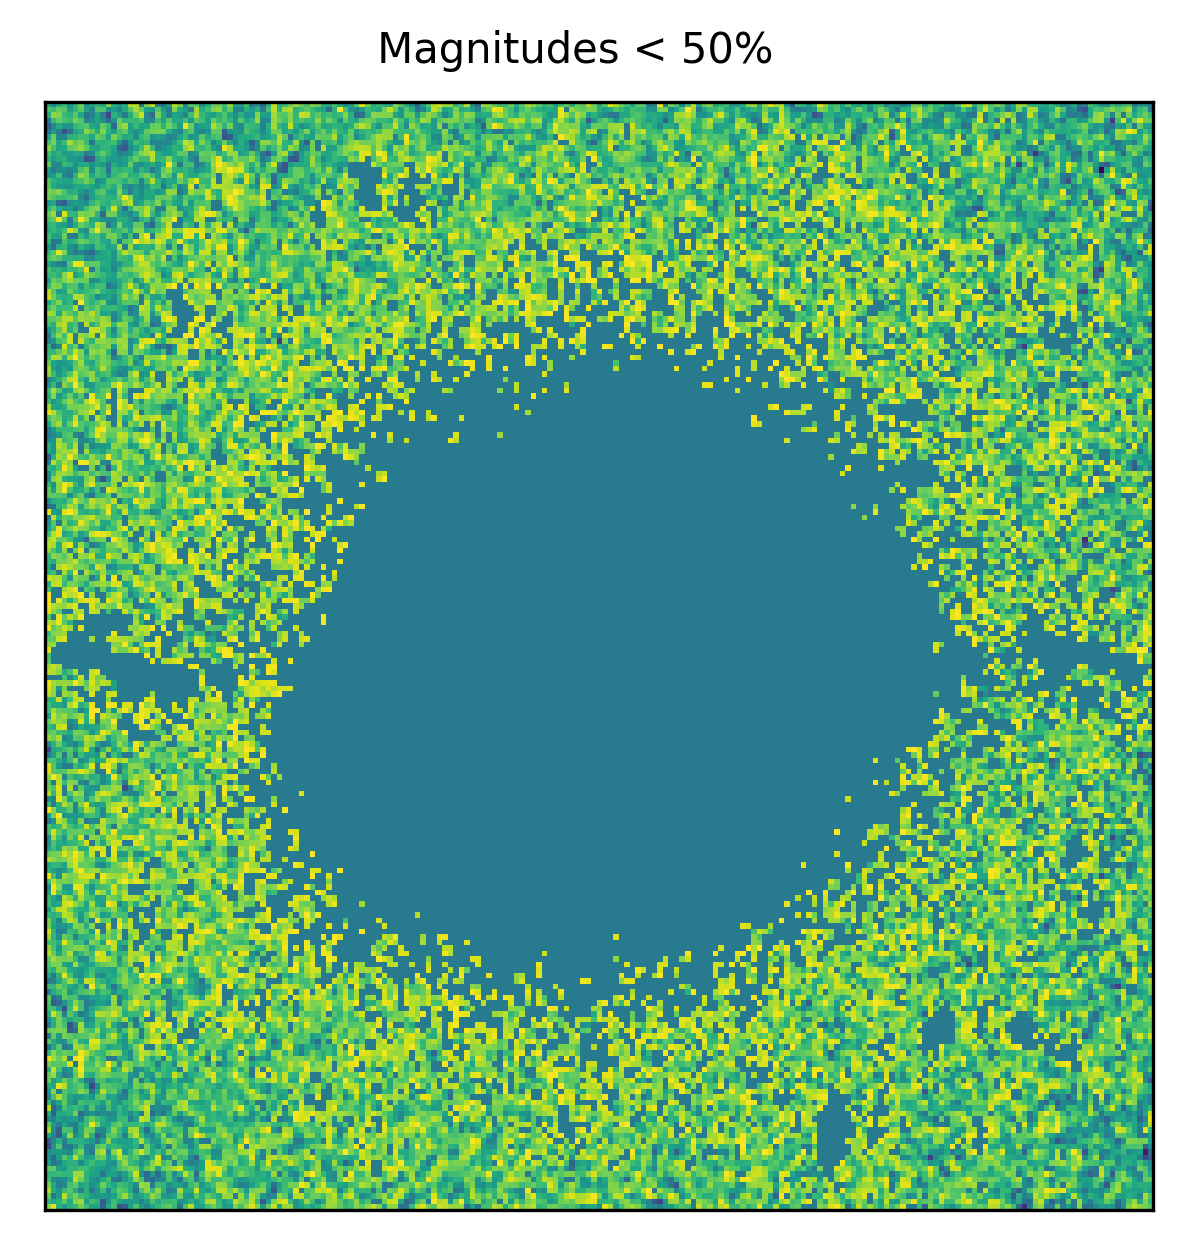

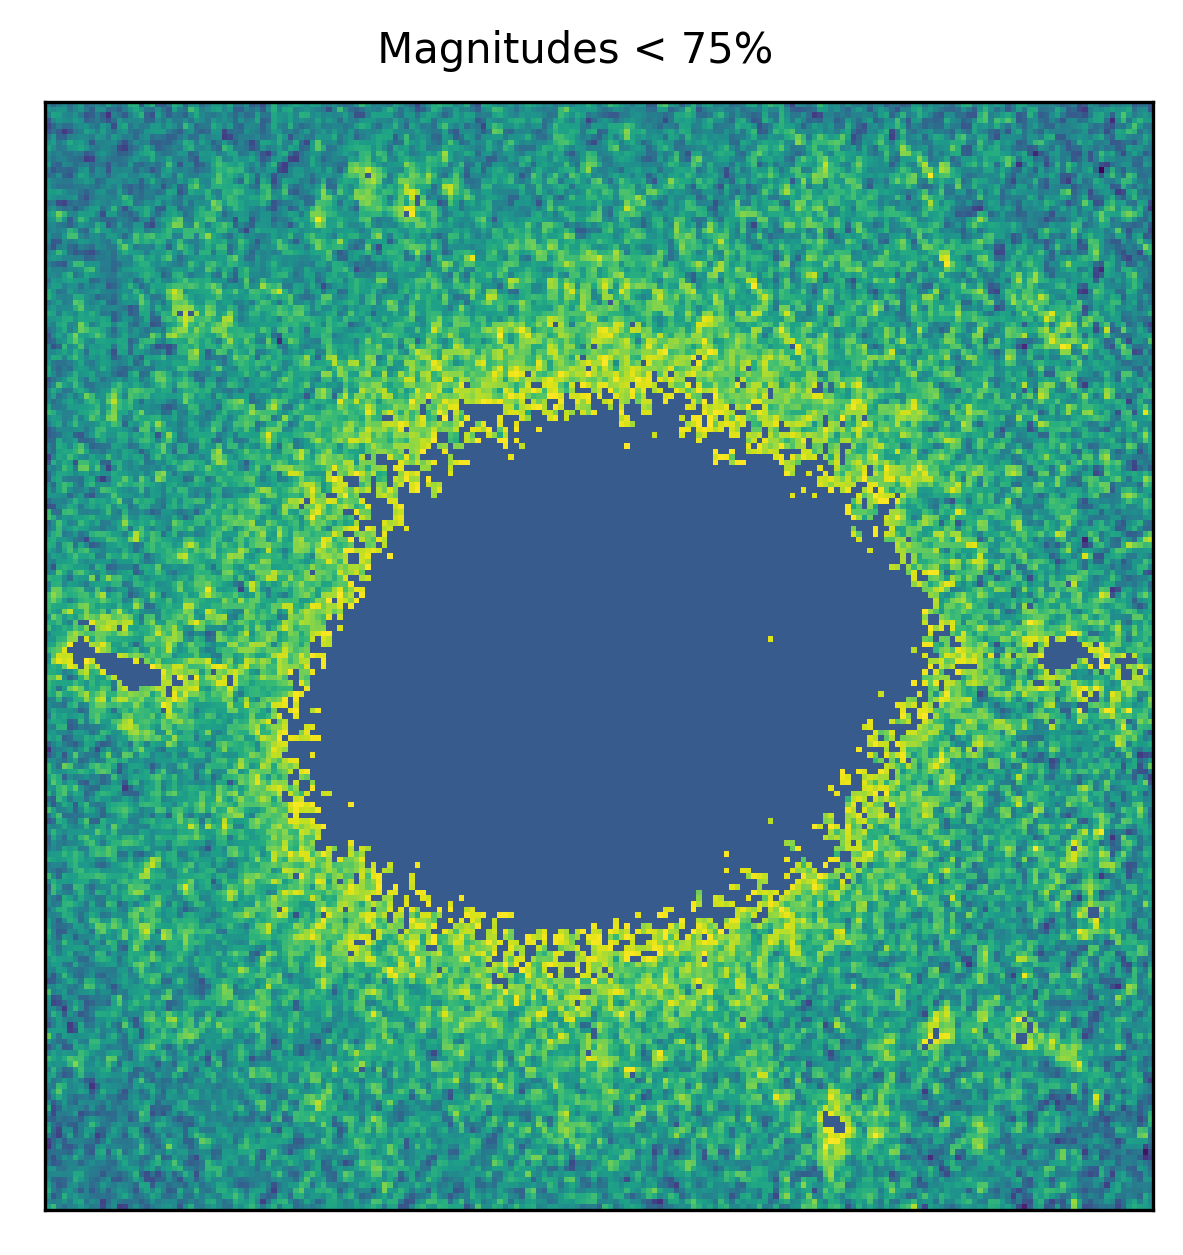

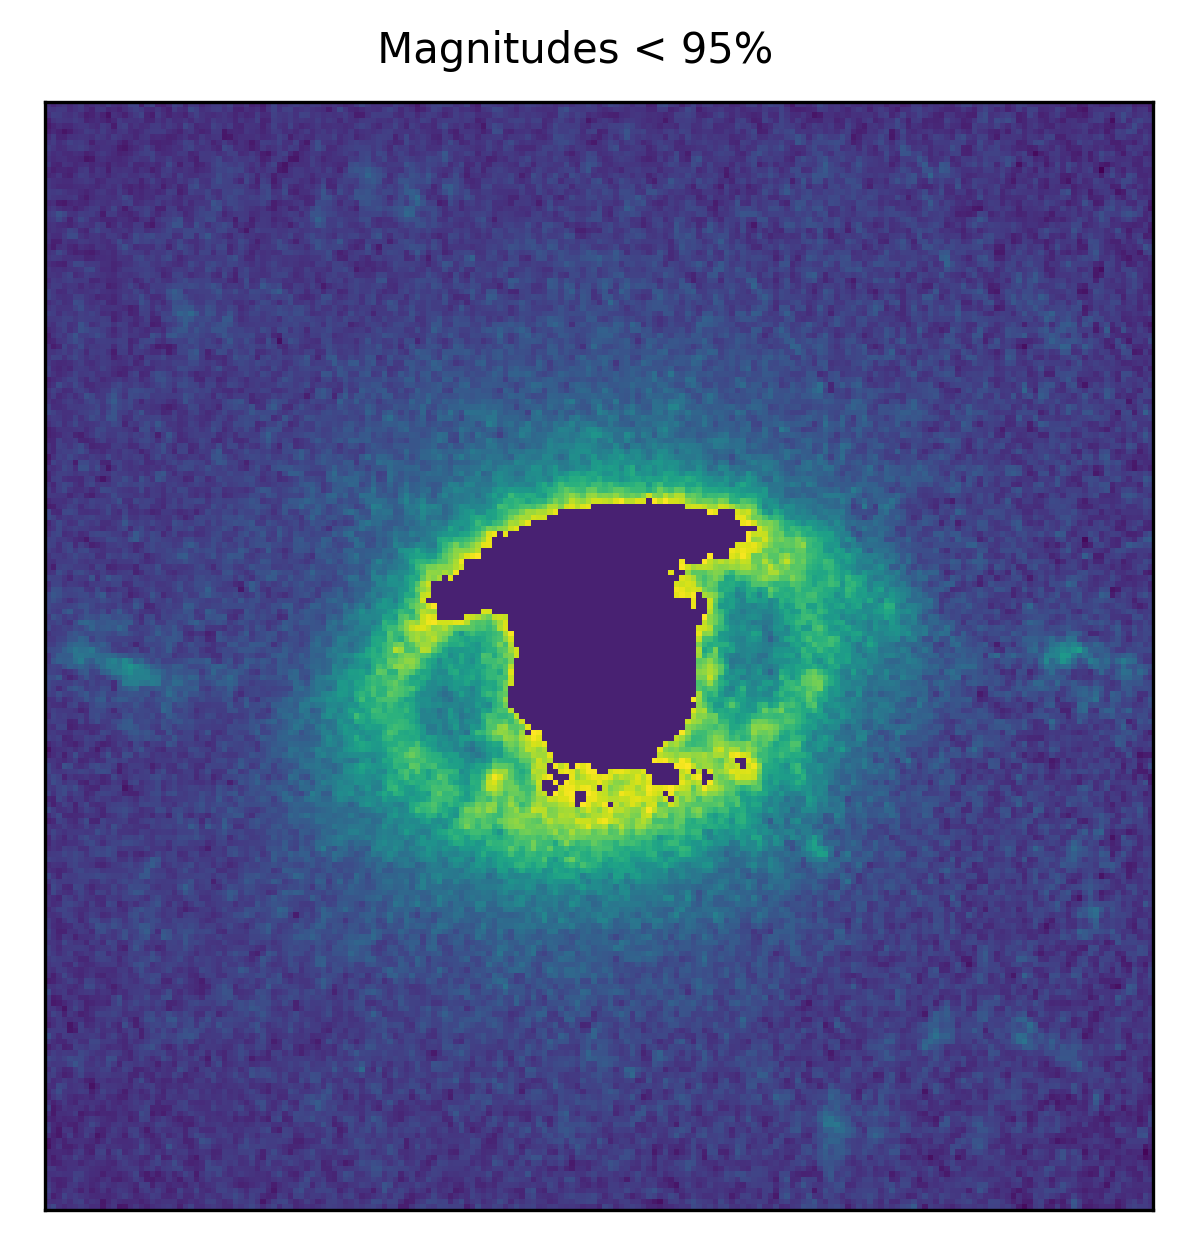

In [65]:
pcolors = ['red', 'green', 'orange', 'k', 'blue', 'brown']
plist = [15, 25, 50, 75, 95]
cube_lambda = cube[0]


mean_std_cube = []
for i, p in enumerate(plist):
    fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, dpi=300,
                        gridspec_kw={'hspace': 0.1, 'wspace': -0.7})
    
    max_val = np.percentile(cube_lambda, p)
    mask_in = np.array(cube_lambda<max_val, dtype='float')
    cube_filtered = cube_lambda * mask_in
    
    mean_per_frame = np.mean(cube_filtered, axis=(1, 2))
    std_per_frame = np.std(cube_filtered, axis=(1,2))
    mean_std_cube.append(std_per_frame)

    cube_filtered += mean_per_frame[:, None, None]
    
    axes.imshow(cube_filtered[0])
    axes.set_xticks([])
    axes.set_yticks([])
    fig.suptitle(' Magnitudes < {}% '.format(p), fontsize=10, y=0.93)
    fig.savefig('./figures/cube_percentil/{}.png'.format(p), format='png', bbox_inches='tight')
    

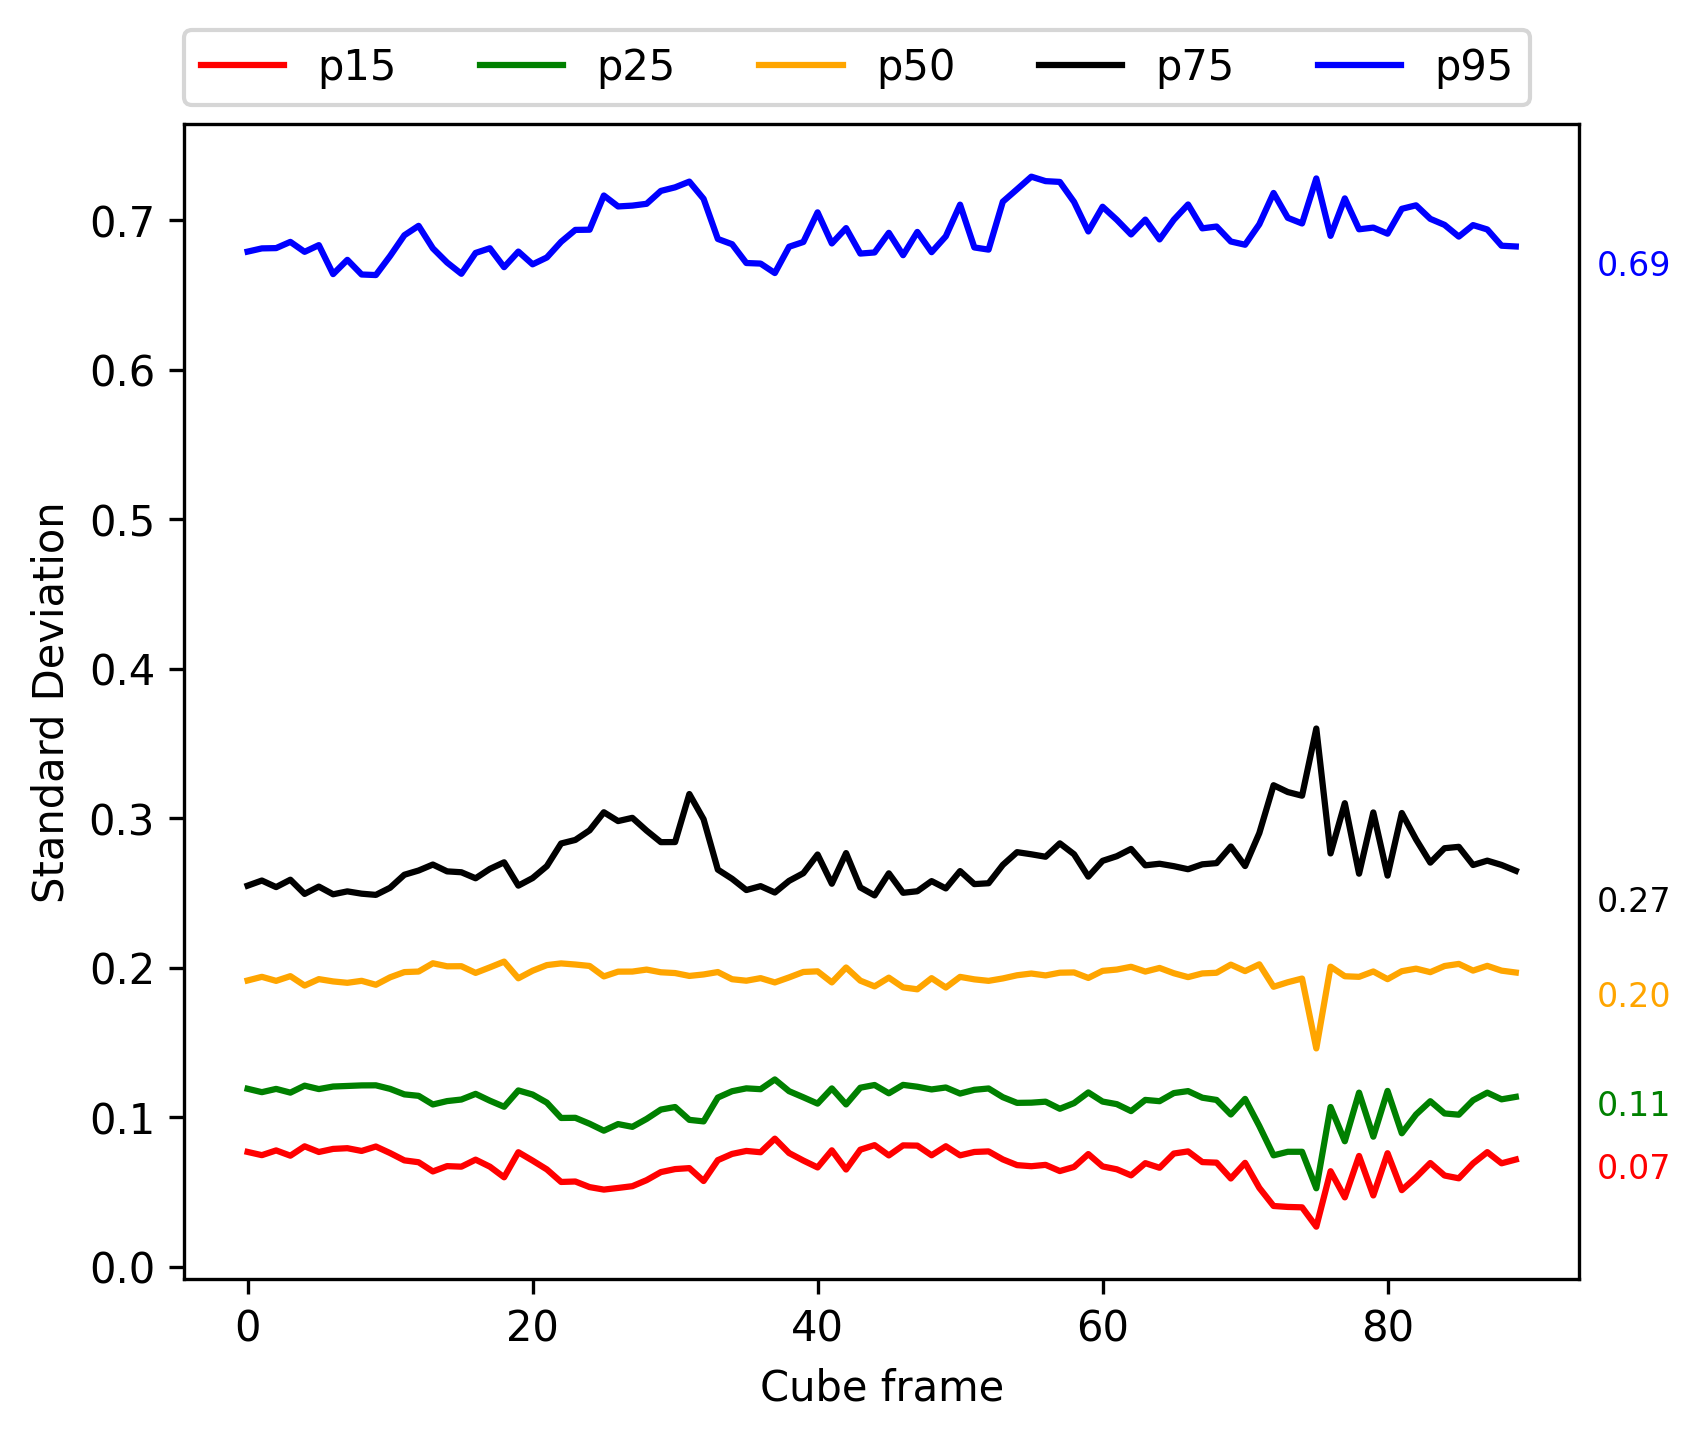

In [70]:
plt.figure(figsize=(6, 5), dpi=300)
for i, p in enumerate(plist):
    plt.plot(mean_std_cube[i], label='p{}'.format(p), color=pcolors[i])
    plt.text(0.91, mean_std_cube[i][0]+0.1, '{:.2f}'.format(np.mean(mean_std_cube[i])) , 
         color=pcolors[i],
         fontsize=8, transform=plt.gcf().transFigure)
        
plt.xlabel('Cube frame')
plt.ylabel('Standard Deviation')
plt.legend(ncol=5, bbox_to_anchor=(0.98, 1.1))

In [55]:
single_im = cube[0, 0]

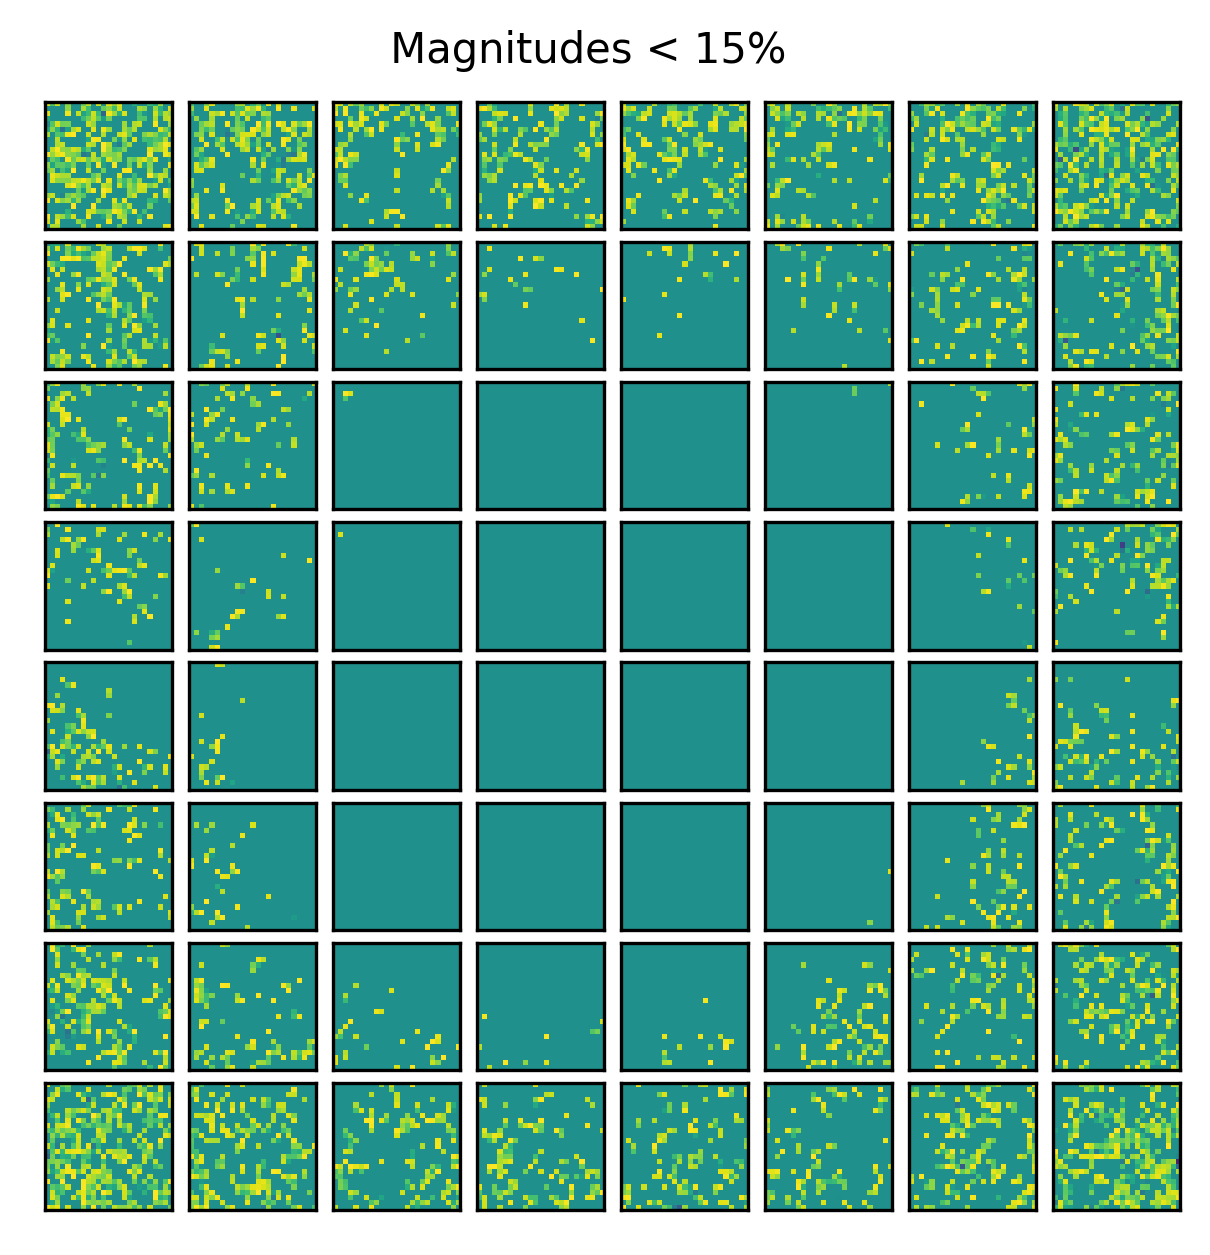

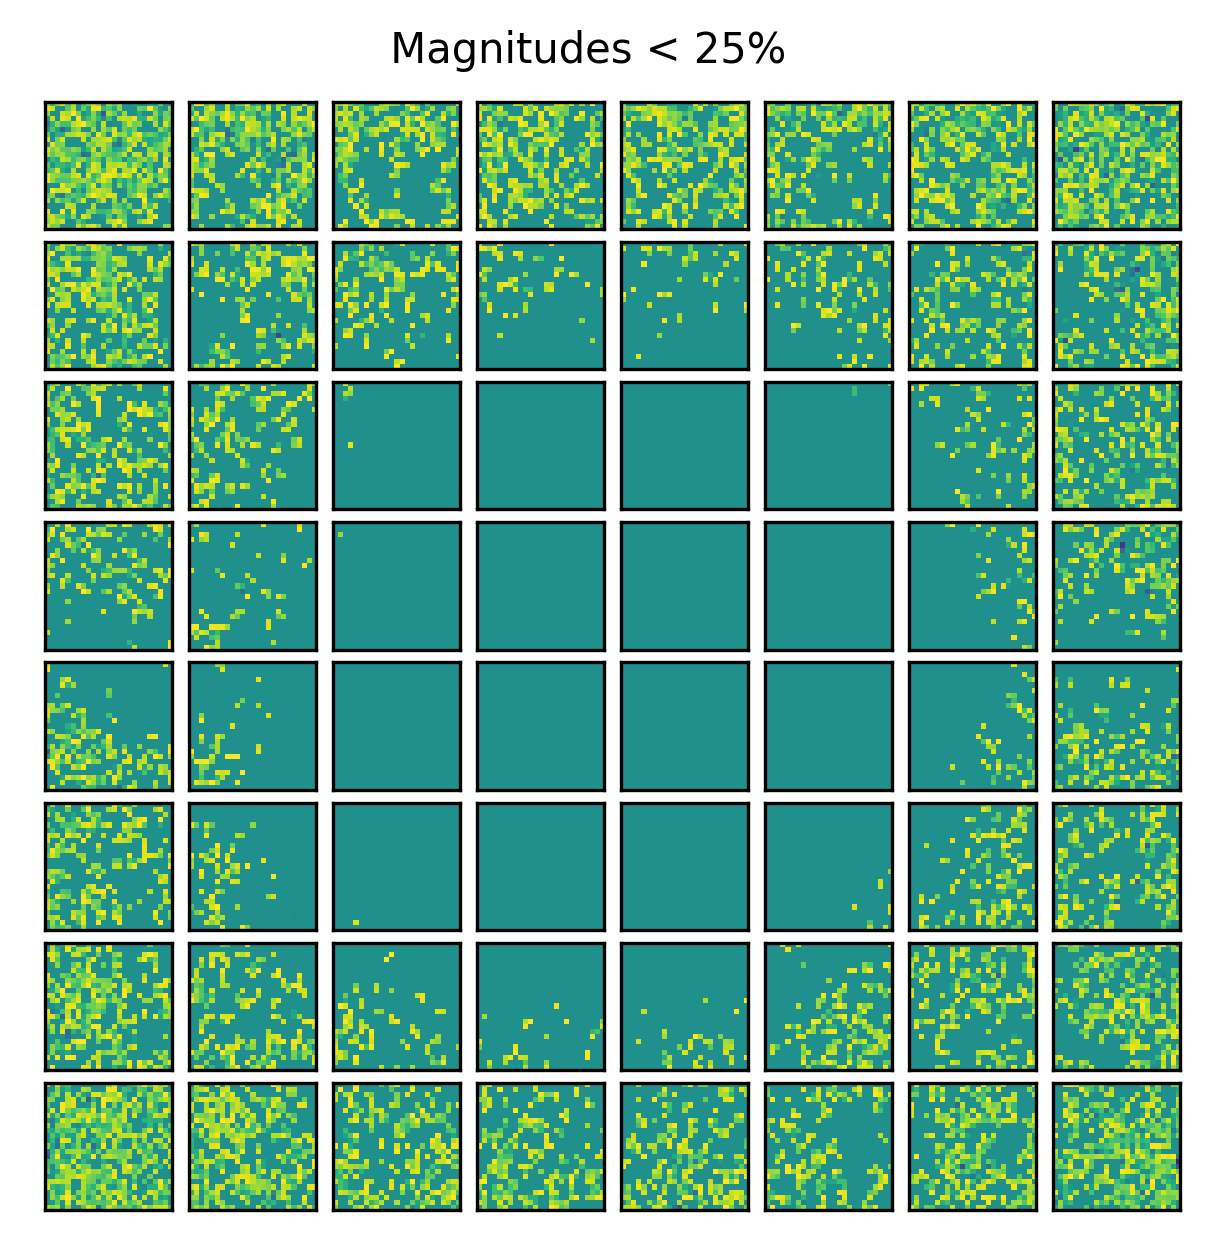

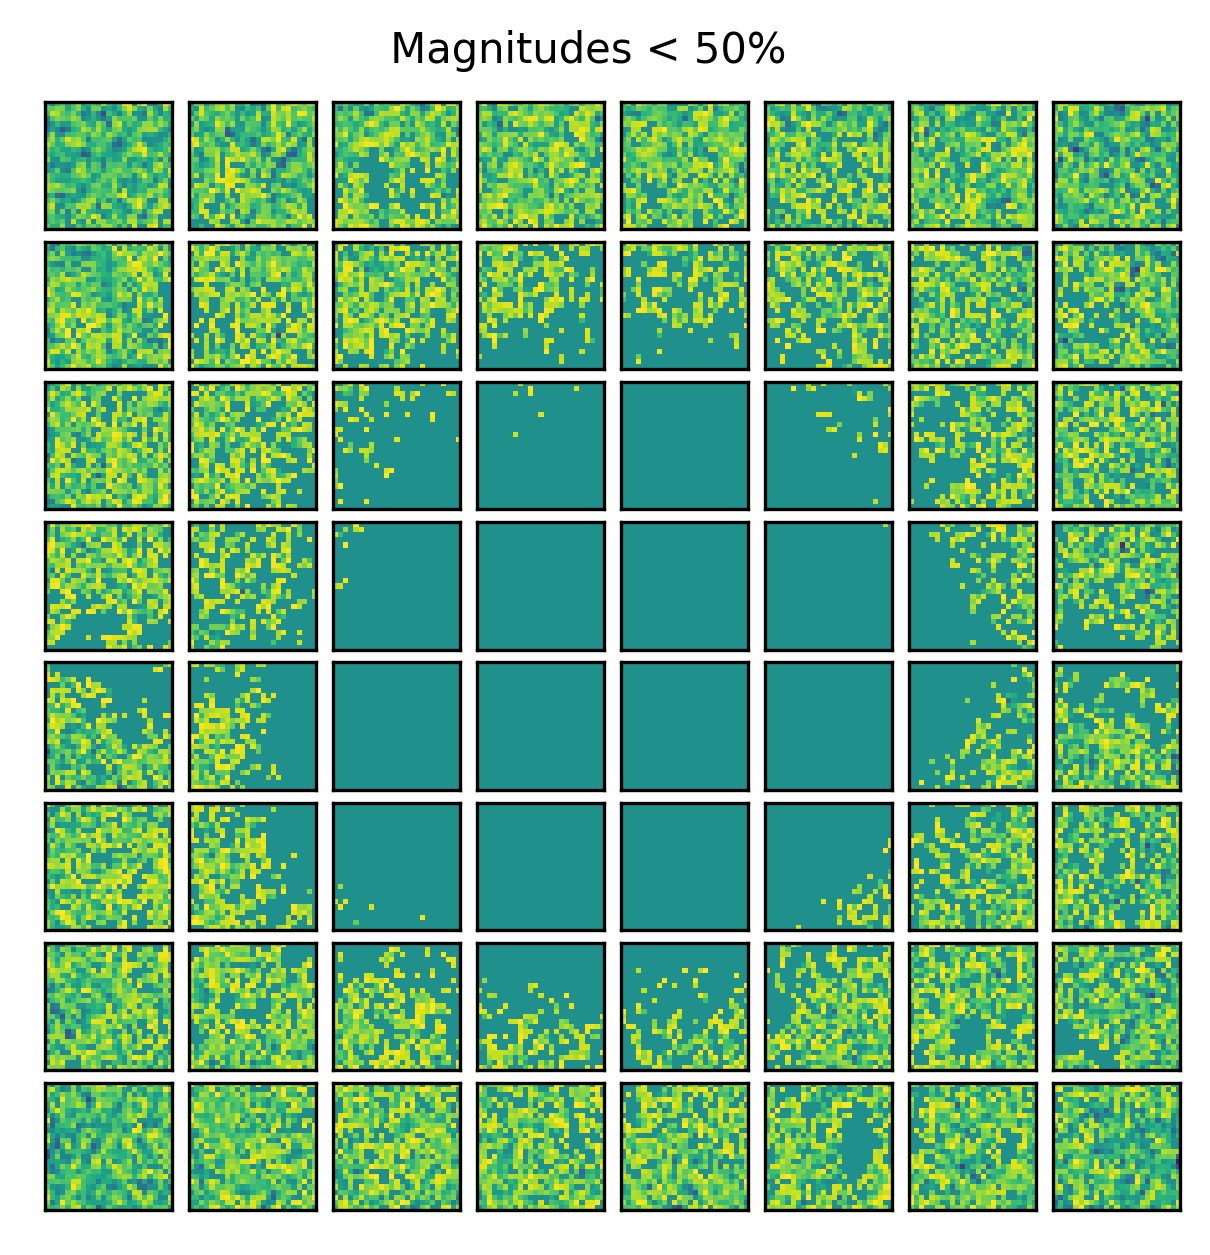

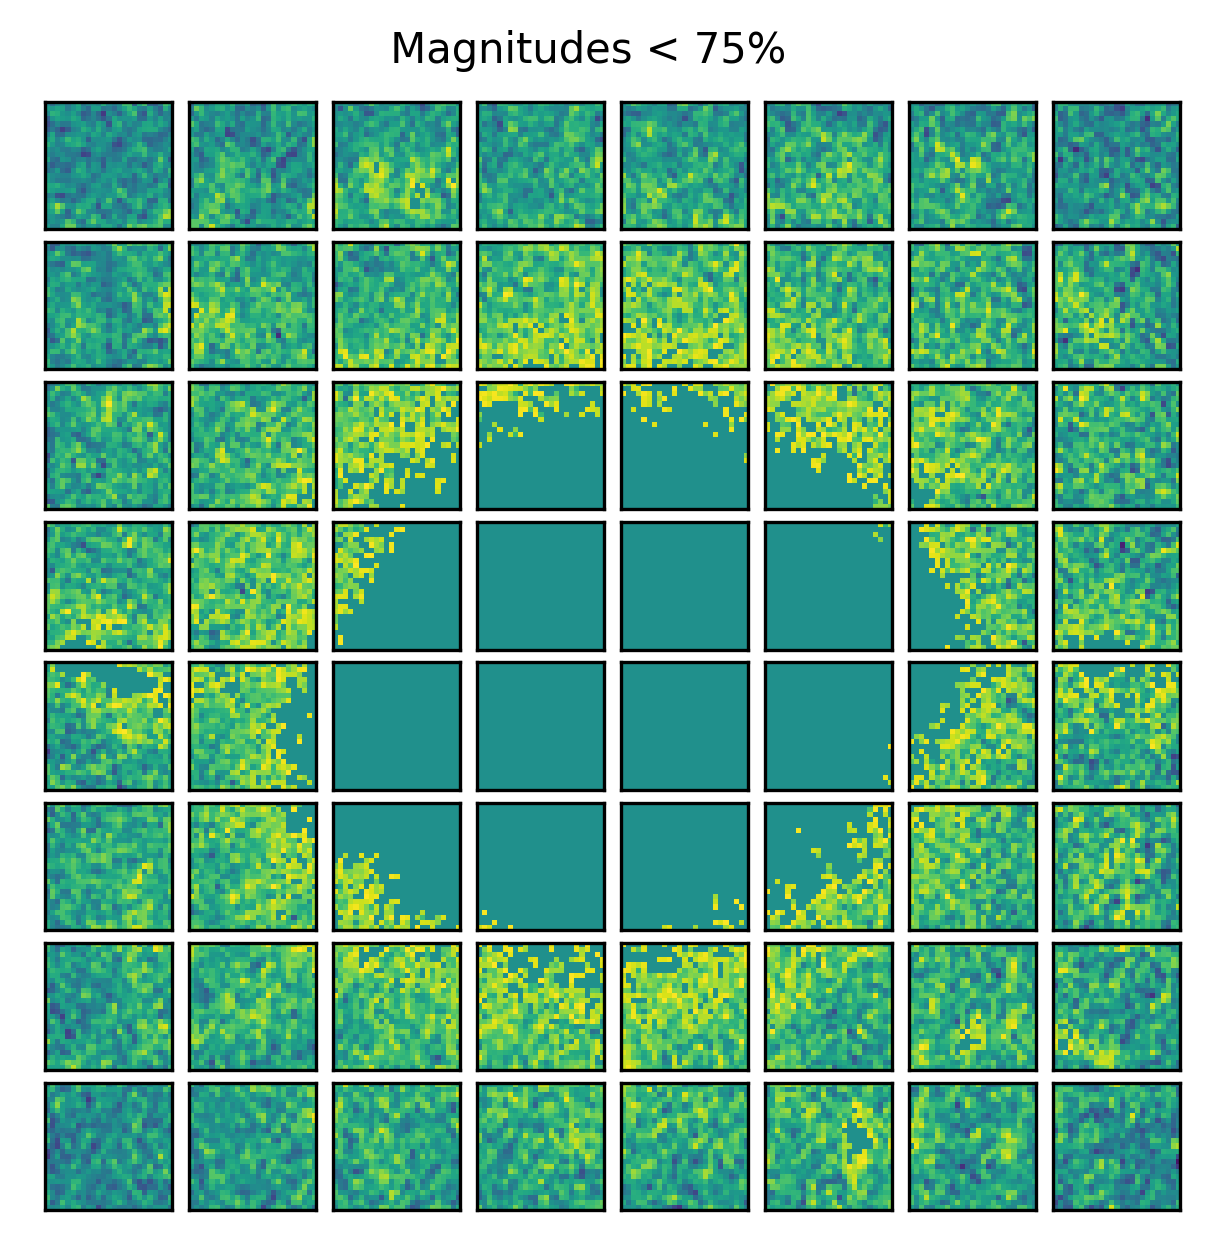

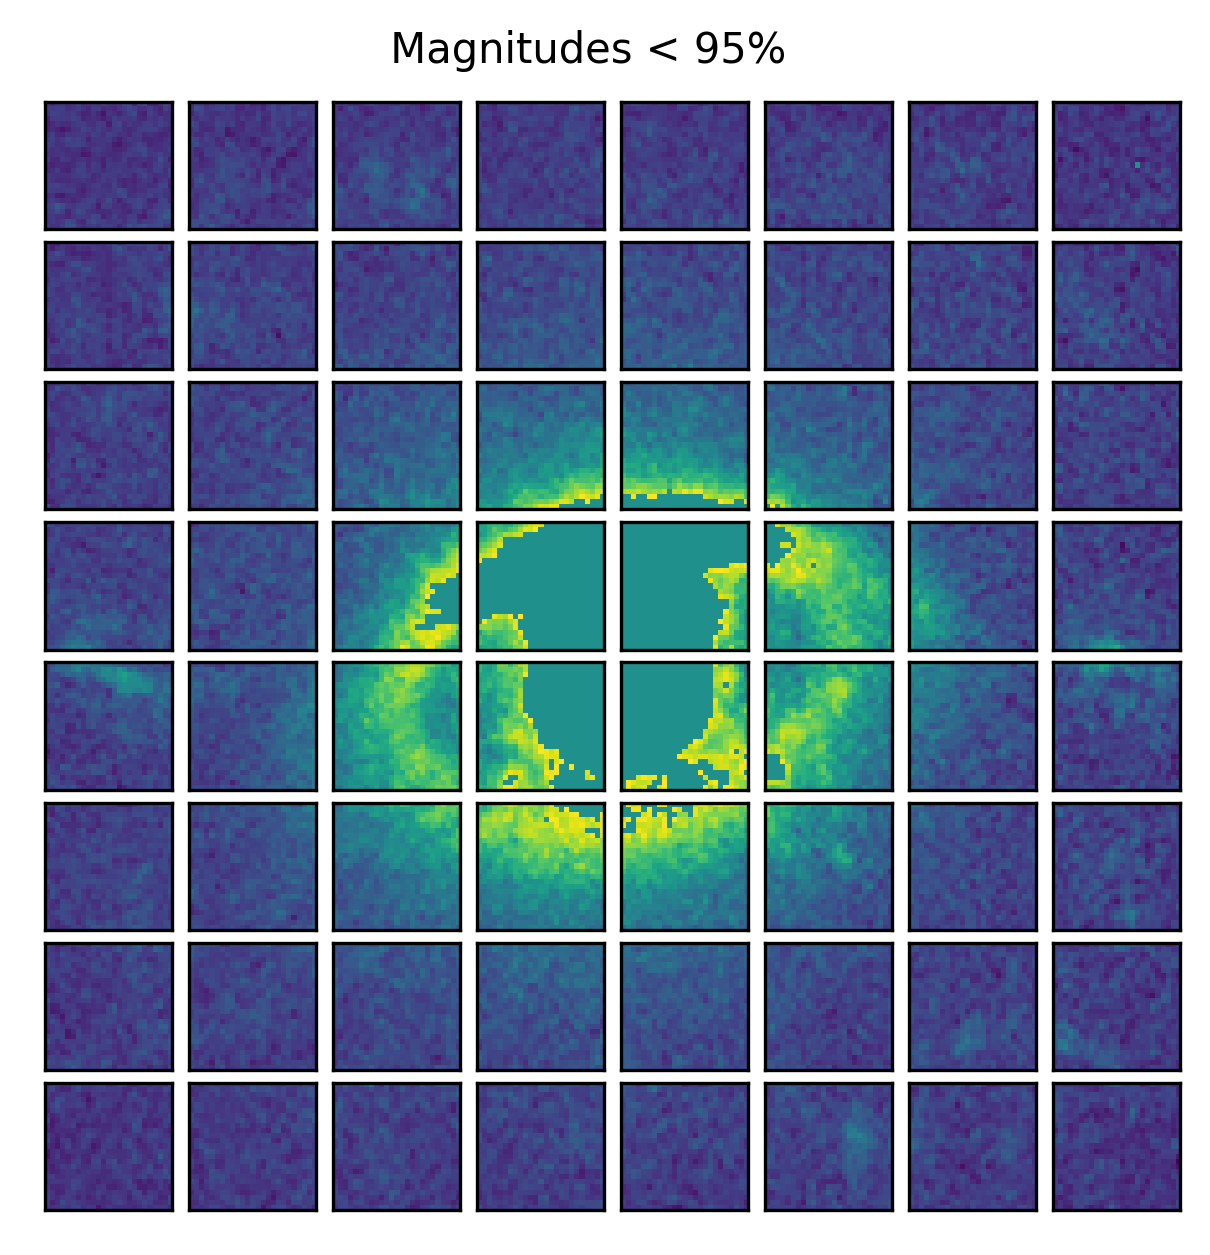

In [40]:
winsize = 25
n_windows = cube.shape[-1]//winsize

plim_std = []
plim_mean = []
plist = [15, 25, 50, 75, 95]
for plim in plist:
    fig, axes = plt.subplots(n_windows, n_windows, sharex=True, sharey=True, dpi=300,
                            gridspec_kw={'hspace': 0.1, 'wspace': -0.7})

    max_val = np.percentile(single_im, plim)
    min_val = single_im.min()
    mean = (max_val+min_val)/2
    in_mask  = np.array((single_im < max_val) & (single_im > min_val), dtype='float32')

    init_y = 0
    stds = []
    for i in range(n_windows):
        init_x = 0
        for j in range(n_windows):
            window = single_im[init_x:init_x+winsize, init_y:init_y+winsize] 
            window_mask = in_mask[init_x:init_x+winsize, init_y:init_y+winsize]

            values = window * window_mask
            filler = np.ones_like(window)*mean * (1.- window_mask)
            new_window = values+filler
            stds.append(np.std(new_window))
            axes[j][i].imshow(new_window, 
                              vmin=min_val, vmax=max_val)
            axes[j][i].set_xticks([])
            axes[j][i].set_yticks([])
            init_x+=winsize
        init_y+=winsize
    plim_std.append(stds)
    plim_mean.append(np.mean(stds))
    
    fig.suptitle(' Magnitudes < {}% '.format(plim), fontsize=10, y=0.93)
#     fig.savefig('./figures/percentile/{}.png'.format(plim), format='png', bbox_inches='tight')

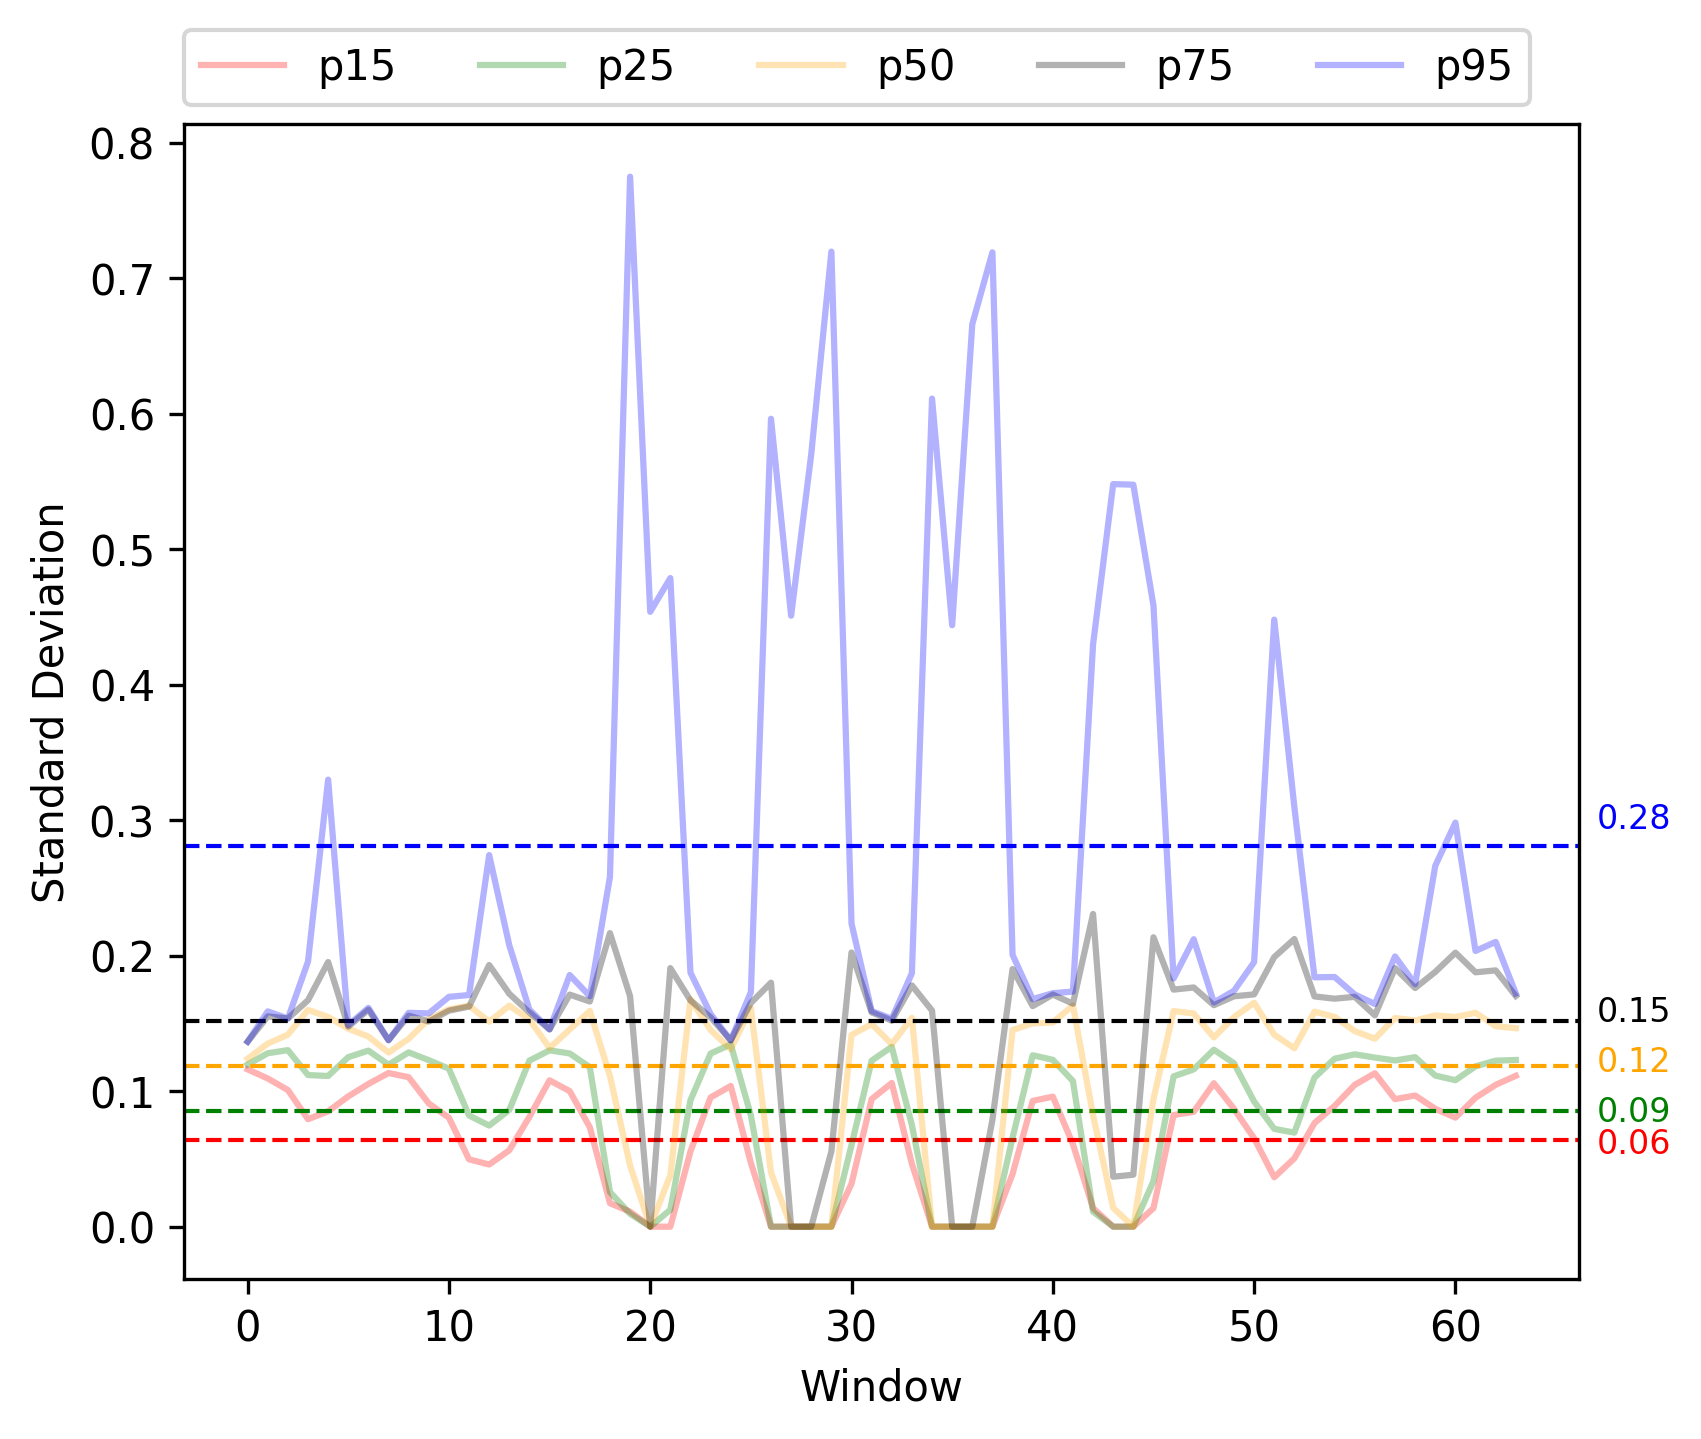

In [69]:
pcolors = ['red', 'green', 'orange', 'k', 'blue', 'brown']
plt.figure(dpi=300, figsize=(6, 5))
for i, pres in enumerate(plist):
    plt.plot(plim_std[i], label='p{}'.format(pres), color=pcolors[i], alpha=.3)
    plt.axhline(y=plim_mean[i], color=pcolors[i], linestyle='--', linewidth=1)
    
    plt.text(0.91, plim_mean[i]+0.13, '{:.2f}'.format(plim_mean[i]) , 
             color=pcolors[i],
             fontsize=8, transform=plt.gcf().transFigure)
    
plt.xlabel('Window')
plt.ylabel('Standard Deviation')
plt.legend(ncol=5, bbox_to_anchor=(0.98, 1.1))